In [90]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [48]:
ccdata = files.upload()

Saving card_transdata.csv to card_transdata (2).csv


In [49]:
data = pd.read_csv("card_transdata.csv")

In [50]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [51]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0
999999,58.108125,0.318110,0.386920,1,1,0,1,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [53]:
data.shape

(1000000, 8)

In [54]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [56]:
data.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,int64
used_chip,int64
used_pin_number,int64
online_order,int64
fraud,int64


In [57]:
# Cleaning the Data

missing_values = data.isnull().any(axis=1)
print("Rows with missing Values :", missing_values)

Rows with missing Values : 0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


In [58]:
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows: ", duplicated_rows)

Duplicated Rows:  Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [59]:
#data.dropna(axis=0, inplace=True)
#data.drop_duplicates(inplace=True)

In [60]:
#Examining Chip and Pin transactions

chippindf = data[["used_chip","used_pin_number","fraud"]]

In [61]:
chippindf.head()

,used_chip,used_pin_number,fraud
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0


In [62]:
total_transactions = len(chippindf)
total_fraud = chippindf["fraud"].sum()
fraud_by_chip = chippindf[chippindf["used_chip"]==1]["fraud"].sum()
fraud_by_pin = chippindf[chippindf["used_pin_number"]==1]["fraud"].sum()

In [63]:
print("Total transactions:",total_transactions)
print("Total fraud cases:",total_fraud)
print("Fraud cases using chip: {} out of {}".format(fraud_by_chip, total_transactions))
print("Fraud cases using pin: {} out of {}".format(fraud_by_pin, total_transactions))

Total transactions: 1000000
Total fraud cases: 87403
Fraud cases using chip: 22410 out of 1000000
Fraud cases using pin: 273 out of 1000000


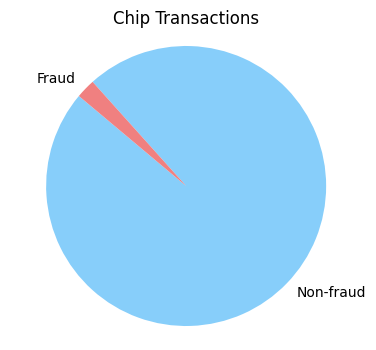

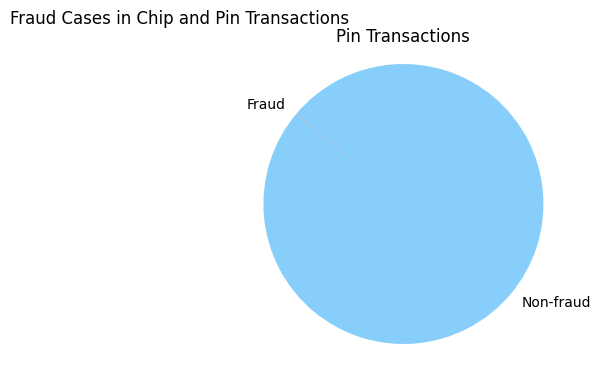

In [64]:
labels_chip = ["Non-fraud","Fraud"]
sizes_chip = [total_transactions - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue", "lightcoral"]

labels_pin = ["Non-fraud","Fraud"]
sizes_pin = [total_transactions - fraud_by_pin, fraud_by_pin]
colors_pin = ["lightskyblue", "lightcoral"]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(sizes_chip, labels=labels_chip, colors=colors_chip, startangle=140)
plt.axis("equal")
plt.title("Chip Transactions")

plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.pie(sizes_pin, labels=labels_pin, colors=colors_pin, startangle=140)
plt.axis("equal")
plt.title("Pin Transactions")

plt.suptitle("Fraud Cases in Chip and Pin Transactions")
plt.show()

In [65]:
#Repeat Retailer vs Fraudulent Activity pattern Analysis

repeat_retailer_df = data[data["repeat_retailer"]==1]

fraud_sequences = []
current_sequence = []

for index, row in repeat_retailer_df.iterrows():
  repeat_retailer, is_fraud = row["repeat_retailer"], row["fraud"]
  if is_fraud == 1:
    if current_sequence:
      fraud_sequences.append(current_sequence.copy())
    current_sequence = []
  else:
    current_sequence.append("Repeat Retailer" if repeat_retailer == 1 else "No Repeat Retailer")

for i, sequence in enumerate(fraud_sequences[:10], start=1):
  print(f"Fraud sequence {i}: {', '.join(sequence)}")


Fraud sequence 1: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 2: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 3: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 4: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 5: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 6: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud sequence 7: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retail

In [66]:
# Finding Correlation Between Transactions Amounts and Fraud

correlation_df = data[["ratio_to_median_purchase_price", "fraud"]]

correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud: {correlation}")

Correlation between transaction amount and fraud: 0.4623047222882327


In [67]:
avgnonfraudtransaction = correlation_df[correlation_df["fraud"]==0]["ratio_to_median_purchase_price"].mean()
avgfraudtransaction = correlation_df[correlation_df["fraud"]==1]["ratio_to_median_purchase_price"].mean()

print(f"Average Ration to Median purchase price for non fraudulent transactions: {avgnonfraudtransaction}")
print(f"Average Ration to Median purchase price for non fraudulent transactions: {avgfraudtransaction}")

Average Ration to Median purchase price for non fraudulent transactions: 1.423641855458115
Average Ration to Median purchase price for non fraudulent transactions: 6.006323490487404


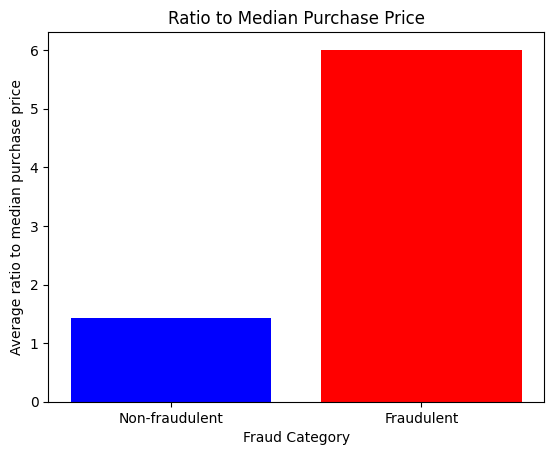

In [68]:
categories = ["Non-fraudulent","Fraudulent"]
average_ratio = [avgnonfraudtransaction,avgfraudtransaction]
plt.bar(categories, average_ratio, color=['blue','red'])
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Fraud Category")
plt.ylabel("Average ratio to median purchase price")
plt.show()

In [69]:
# Analyzing Fraud Cases in Online Transactions

online_order_df = data[["online_order", "fraud"]]

total_online_orders = online_order_df["online_order"].sum()
total_online_fraud = online_order_df[(online_order_df["fraud"]==1)&(online_order_df["online_order"]==1)]["fraud"].count()
fraud_rate_online = total_online_fraud/total_online_orders

total_offline_orders = len(online_order_df) - total_online_orders
total_offline_fraud = online_order_df[(online_order_df["fraud"]==0)&(online_order_df["online_order"]==0)]["fraud"].count()
fraud_rate_offline = total_offline_fraud/total_offline_orders

print(f"Fraud rate for online transactions: {fraud_rate_online:.2%} ({total_online_fraud} cases out of {total_online_orders} online transactions)")
print(f"Fraud rate for offline transactions: {fraud_rate_offline:.2%} ({total_offline_fraud} cases out of {total_offline_orders} offline transactions)")

Fraud rate for online transactions: 12.71% (82711 cases out of 650552 online transactions)
Fraud rate for offline transactions: 98.66% (344756 cases out of 349448 offline transactions)


In [75]:
# Conducting Feature Selection with Randon Forest

X = data.drop("fraud", axis=1)
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)
feature_importances = pd.Series(rf_classifier.feature_importances_,index=X.columns).sort_values(ascending=False)
print("Ranked Feature Importance:")
print(feature_importances)

Ranked Feature Importance:
ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


In [76]:
X = data.drop("fraud", axis=1)
y = data["fraud"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)
new_transaction_features = data.sample(1).drop('fraud',axis=1)
print("\nRandomly sampled features for new transaction:")
print(new_transaction_features)
prediction = rf_classifier.predict(new_transaction_features)
print("\nPrediction for new transaction:")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Randomly sampled features for new transaction:
        distance_from_home  distance_from_last_transaction  \
701417           50.515807                        1.485798   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
701417                        0.994661                1          0   

        used_pin_number  online_order  
701417                0             0  

Prediction for new transaction:
Legitimate


In [79]:
new_transaction_features1 = pd.DataFrame({
    'distance_from_home': [85],
    'distance_from_last_transaction': [75],
    'ratio_to_median_purchase_price': [5.1],
    'repeat_retailer': [0],
    'used_chip': [1],
    'used_pin_number': [0],
    'online_order': [0]
})

prediction = rf_classifier.predict(new_transaction_features1)
print("\nPrediction for new transaction:")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Prediction for new transaction:
Fraud


In [81]:
# Credit Card Fraud Detection with Logistic Regression

X = data.drop("fraud", axis=1)
y = data["fraud"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
logreg_classifier = LogisticRegression(max_iter = 1000, random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)
new_transaction_features1 = pd.DataFrame({
    'distance_from_home': [85],
    'distance_from_last_transaction': [75],
    'ratio_to_median_purchase_price': [5.1],
    'repeat_retailer': [0],
    'used_chip': [1],
    'used_pin_number': [0],
    'online_order': [0]
})

prediction = logreg_classifier.predict(scaler.transform(new_transaction_features1))
print("\nPredictions for New Transactions:")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Predictions for New Transactions:
Legitimate


In [92]:
data1 = data.sample(1000, random_state=42)

In [93]:
# Credit Card Fraud Detection Model with SVM

X = data1.drop("fraud", axis=1)
y = data1["fraud"]

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel = "linear", probability = True, random_state = 42)
calibrated_svm = CalibratedClassifierCV(svm_classifier)
calibrated_svm.fit(X_scaled, y)
distance_from_home = float(input("Enter Distance From Home: "))
distance_from_last_transaction = float(input("Enter Distance from Last Transaction: "))
ratio_to_median_purchase_price = float(input("Enter Ratio to Median Purchase Price: "))
repeat_retailer = int(input("Enter Repeat Retailer (0 or 1): "))
used_chip = int(input("Enter Used Chip Number (0 or 1): "))
used_pin_number = int(input("Enter Used Pin Number (0 or 1): "))
online_order = int(input("Enter Online Orderr (0 or 1): "))
new_transaction_features2 = pd.DataFrame({
    'distance_from_home': [distance_from_home],
    'distance_from_last_transaction': [distance_from_last_transaction],
    'ratio_to_median_purchase_price': [ratio_to_median_purchase_price],
    'repeat_retailer': [repeat_retailer ],
    'used_chip': [used_chip],
    'used_pin_number': [used_pin_number],
    'online_order': [online_order]
})

scaled_transaction = scaler.transform(new_transaction_features2)
prediction = calibrated_svm.predict(scaled_transaction)
probability_of_fraud = calibrated_svm.predict_proba(scaled_transaction)[:,1][0]
print("\nPrediction for New Transaction:")
print("Fraud" if prediction[0] == 1 else "Legitimate")
print(f"Probability of Fraud: {probability_of_fraud * 100:.2f}%")

Enter Distance From Home: 78
Enter Distance from Last Transaction: 62
Enter Ratio to Median Purchase Price: 7.2
Enter Repeat Retailer (0 or 1): 1
Enter Used Chip Number (0 or 1): 1
Enter Used Pin Number (0 or 1): 0
Enter Online Orderr (0 or 1): 1

Prediction for New Transaction:
Fraud
Probability of Fraud: 74.00%
